In [205]:
# Dependencies
import numpy as np

import pandas as pd

import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Further libraries to figure out queries

%matplotlib inline
from matplotlib import style
style.use('bmh')
import matplotlib.pyplot as plt
# Adding a Trendline and Equation for addional query's graphs
import seaborn as sns
from scipy import stats

In [206]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [207]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [208]:
# 1. Import the sqlalchemy extract function.
from cmath import nan
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

june_date_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) == 6).all()

print(june_date_temps)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [209]:
#  3. Convert the June temperatures to a list.

june_date_temps = list(june_date_temps)

In [210]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 

df_june = pd.DataFrame(june_date_temps, columns=['date', 'June Temps'])

df_june.set_index(df_june['date'], inplace=True)

print(df_june.to_string(index=False))

       date  June Temps
 2010-06-01        78.0
 2010-06-02        76.0
 2010-06-03        78.0
 2010-06-04        76.0
 2010-06-05        77.0
 2010-06-06        78.0
 2010-06-07        77.0
 2010-06-08        78.0
 2010-06-09        78.0
 2010-06-10        79.0
 2010-06-11        78.0
 2010-06-12        78.0
 2010-06-13        78.0
 2010-06-14        77.0
 2010-06-15        78.0
 2010-06-16        78.0
 2010-06-17        77.0
 2010-06-18        77.0
 2010-06-19        82.0
 2010-06-20        78.0
 2010-06-21        78.0
 2010-06-22        78.0
 2010-06-23        78.0
 2010-06-24        78.0
 2010-06-25        77.0
 2010-06-26        76.0
 2010-06-27        78.0
 2010-06-28        78.0
 2010-06-29        78.0
 2010-06-30        78.0
 2011-06-01        77.0
 2011-06-02        78.0
 2011-06-03        73.0
 2011-06-04        70.0
 2011-06-05        76.0
 2011-06-06        77.0
 2011-06-07        77.0
 2011-06-08        77.0
 2011-06-09        77.0
 2011-06-10        78.0
 2011-06-11     

In [211]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_june.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [212]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

dec_date_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) == 12).all()

print(dec_date_temps)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [213]:
# 7. Convert the December temperatures to a list.

dec_date_temps = list(dec_date_temps)

In [214]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(dec_date_temps, columns=['date', 'December Temps'])
df_dec.set_index(df_dec['date'], inplace=True)

print(df_dec.to_string(index=False))

       date  December Temps
 2010-12-01            76.0
 2010-12-03            74.0
 2010-12-04            74.0
 2010-12-06            64.0
 2010-12-07            64.0
 2010-12-08            67.0
 2010-12-09            77.0
 2010-12-10            66.0
 2010-12-11            69.0
 2010-12-12            68.0
 2010-12-13            68.0
 2010-12-14            71.0
 2010-12-15            74.0
 2010-12-16            67.0
 2010-12-17            66.0
 2010-12-18            69.0
 2010-12-19            71.0
 2010-12-23            70.0
 2010-12-24            70.0
 2010-12-26            74.0
 2010-12-27            74.0
 2010-12-28            71.0
 2010-12-29            75.0
 2010-12-30            75.0
 2010-12-31            72.0
 2011-12-01            69.0
 2011-12-02            68.0
 2011-12-03            73.0
 2011-12-04            74.0
 2011-12-05            73.0
 2011-12-06            73.0
 2011-12-07            73.0
 2011-12-08            73.0
 2011-12-09            71.0
 2011-12-10         

In [215]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [216]:
# Get June and Decembers percipitation summary for added queries

june_date_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date) == 6).all()

print(june_date_prcp)

dec_date_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date) == 12).all()

print(june_date_prcp, dec_date_prcp)

[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

In [217]:
june_date_prcp = list(june_date_prcp)

dec_date_prcp = list(dec_date_prcp)

In [218]:
df_june = pd.DataFrame(june_date_prcp, columns=['date', 'June Percipitation'])
df_june.set_index(df_june['date'], inplace=True)

print(df_june.to_string(index=False))

       date  June Percipitation
 2010-06-01                0.00
 2010-06-02                0.01
 2010-06-03                0.00
 2010-06-04                0.00
 2010-06-05                0.00
 2010-06-06                0.00
 2010-06-07                0.00
 2010-06-08                0.00
 2010-06-09                0.00
 2010-06-10                0.00
 2010-06-11                0.00
 2010-06-12                0.00
 2010-06-13                0.00
 2010-06-14                0.00
 2010-06-15                0.00
 2010-06-16                0.00
 2010-06-17                0.00
 2010-06-18                0.00
 2010-06-19                0.00
 2010-06-20                0.00
 2010-06-21                0.00
 2010-06-22                0.00
 2010-06-23                0.00
 2010-06-24                0.00
 2010-06-25                0.00
 2010-06-26                0.02
 2010-06-27                0.00
 2010-06-28                0.00
 2010-06-29                0.00
 2010-06-30                0.00
 2011-06

In [219]:
df_dec= pd.DataFrame(dec_date_prcp, columns=['date', 'December Percipitation'])
df_dec.set_index(df_dec['date'], inplace=True)

print(df_dec.to_string(index=False))

       date  December Percipitation
 2010-12-01                    0.04
 2010-12-03                    0.00
 2010-12-04                    0.00
 2010-12-06                    0.00
 2010-12-07                    0.00
 2010-12-08                    0.00
 2010-12-09                    0.00
 2010-12-10                    1.58
 2010-12-11                    0.77
 2010-12-12                    0.00
 2010-12-13                    0.00
 2010-12-14                    0.00
 2010-12-15                    0.00
 2010-12-16                    0.00
 2010-12-17                    0.00
 2010-12-18                    0.00
 2010-12-19                    1.40
 2010-12-23                    0.00
 2010-12-24                    0.00
 2010-12-26                     NaN
 2010-12-27                    0.13
 2010-12-28                    0.55
 2010-12-29                    0.06
 2010-12-30                    0.01
 2010-12-31                    0.00
 2011-12-01                    0.03
 2011-12-02                 

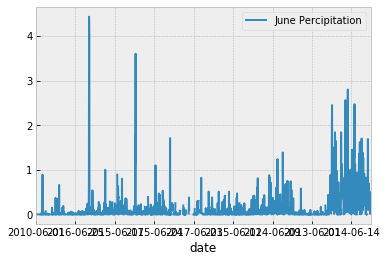

In [220]:
df_june.plot()

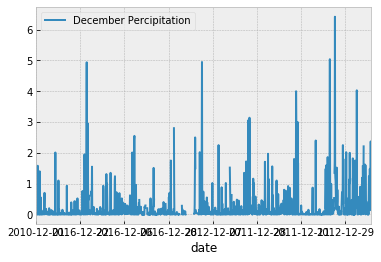

In [221]:
df_dec.plot()